# NLP Data Visualization

### Introduction
This Jupyter notebook is designed to explore and analyze text data using various Natural Language Processing (NLP) techniques. It provides hands-on experience with text visualization, linguistic analysis, and topic extraction. The tasks included in this notebook aim to demonstrate the power of NLP in uncovering hidden patterns, identifying key themes, and gaining insights from textual data. 

### Key Stages of the Notebook
<b>1. Library Setup and Installation</b><br>
Essential libraries for text data analysis and visualization are installed:
- Matplotlib:Supports creating static, interactive, and dynamic visualizations in Python, such as plots and graphs.
- Wordcloud: Generates word clouds to visualize the frequency of words in a given text dataset.
- Textstat: Provides tools to calculate text readability scores and analyze text complexity.
- SpaCy: A powerful library that supports tokenization, named entity recognition (NER), part-of-speech (POS) tagging and text classification.

<b> 2. Text Analysis and Visualization</b><br>
- Word Cloud: Visualizes the most frequently occurring words in text data, highlighting their prominence.
- N-grams: Extracts sequences of consecutive words (e.g., bi-grams and tri-grams) to identify common phrases in the text.
- Named Entity Recognition: Identifies and categorizes key entities like names, locations, and dates in text data.
- POS Tagging: Assigns grammatical labels (e.g., noun, verb, adjective) to words in a sentence to analyze linguistic structure.
- Text Complexity: Evaluates the readability and linguistic difficulty of a text using metrics like grade level or sentence structure.


### Learning Outcome
Upon completion of this Notebook, students will be able to
- Understand how visualizing text data can provide quick insights into underlying patterns.
- Explore how n-grams capture contextual relationships between words.
- Identify and visualize entities like people, organizations, and dates in text using spaCy's displaCy.
- Understand and visualize the grammatical structure of sentences by tagging words with their parts of speech.
- Visualize topics as word clouds.

### What kind of AI Projects would this Jupyter Notebook extend to?
This code provides a foundation for the following types of AI projects:
- <b>Sentiment Analysis:</b> Analyze customer reviews, social media posts, or feedback to identify sentiments (positive, negative, neutral).
- <b>Document Classification:</b> Categorize news articles, emails, or research papers into predefined categories like sports, politics, or science.
- <b>Chatbot Development:</b> Build chatbots capable of recognizing named entities (e.g., dates, names, locations) for intelligent responses.
- <b>Content Recommendation Systems:</b> Suggest similar articles, movies, or books based on the themes/topics of existing user preferences.
- <b>Search Engine Optimization (SEO) and Keyword Analysis:</b> Extract and visualize keywords from web content for optimizing search engine rankings.
- <b>Automated Text Summarization:</b> Generate summaries for long documents, reports, or articles.
- <b>Develop Educational Tools:</b> Develop tools to assess and improve the readability of educational materials.
- <b>Language Translation:</b> Develop systems for language understanding, machine translation, or language-specific insights.


### Content Flow
An outline of the tasks performed in this Python implementation:
1. [Import the required Libraries](#import-the-required-libraries)
2. [Download the Supporting Resources](#download-supporting-resources)
3. [Text Analysis and Visualization](#text-analysis-and-visualization)
    - [Word Cloud](#word-cloud)
    - [N-grams](#n-grams)
    - [Named-Entity Recognition](#named-entity-recognition)
    - [POS Tagging](#pos-tagging)
    - [Topic Modeling](#topic-modeling)
    - [Text Complexity](#text-complexity)

### Time Required
It would take about an hour to complete the process discussed in this notebook. Follow the instructions and go through the additional explanations in this Notebook for easier execution.

### Hardware Requirement:
Any computer with access to internet and web browser.

# Import the required Libraries

In [1]:
#Import the necessary Libraries
#Libraries necessary for WordCloud & Topic Modeling
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#Libraries necessary for N-grams
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

#Libraries necessary for Named Entity Recognition & POS Tagging
import spacy
from spacy import displacy

#Libraries necessary for Topic Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Libraries necessary for Text Complexity Analysis
import textstat

# Download supporting Resources

In [2]:
# Download NLTK resource
nltk.download('punkt')
#Download the model
spacy.cli.download("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fyzan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Text Analysis and Visualization

## Word Cloud

In [3]:
#Input text
text = "I come from haunts of coot and hern, I make a sudden sally, And sparkle out among the fern"

In [4]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      collocations=False, stopwords = STOPWORDS).generate(text)

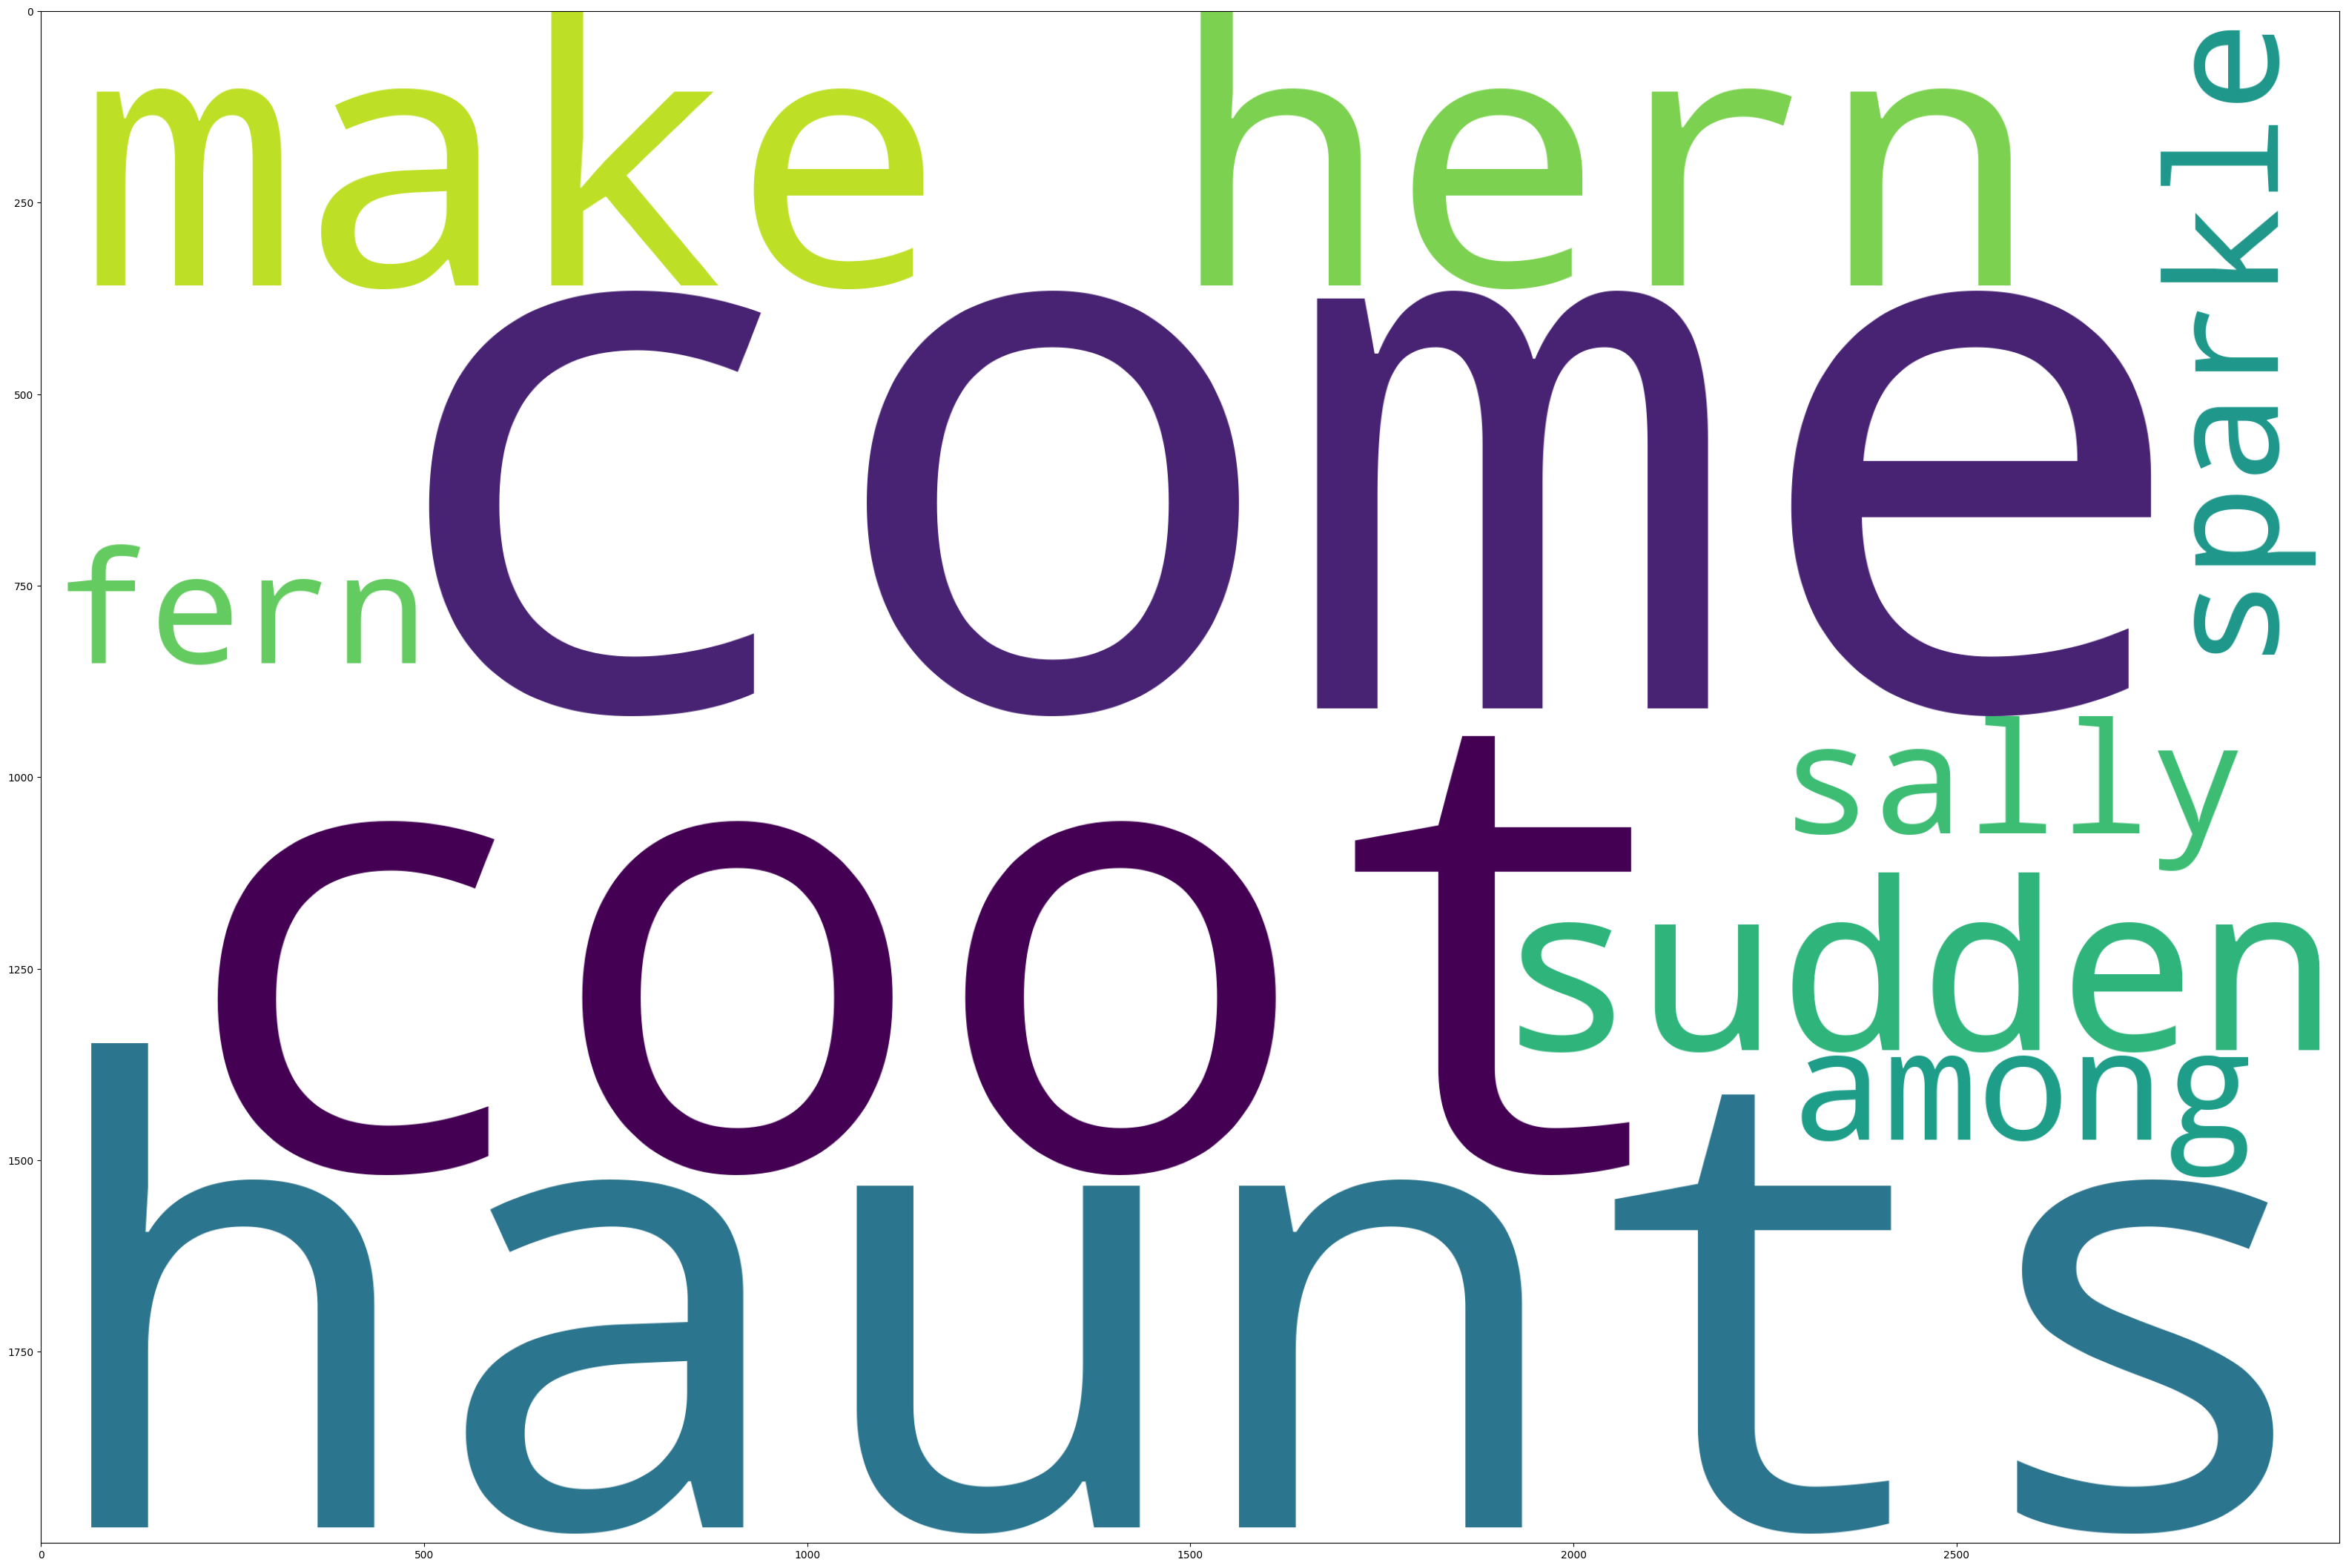

In [5]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)

## N-grams

In [6]:
# Sample text
text = "This is a simple example to generate bigrams."

In [7]:
# Tokenize the text into words
words = word_tokenize(text)

In [8]:
# Generate bigrams
bigrams = list(ngrams(words, 2))

In [9]:
# Print the bigrams
print(bigrams)

[('This', 'is'), ('is', 'a'), ('a', 'simple'), ('simple', 'example'), ('example', 'to'), ('to', 'generate'), ('generate', 'bigrams'), ('bigrams', '.')]


In [10]:
# Generate trigrams
trigrams = list(ngrams(words, 3))

In [11]:
# Print the trigrams
print(trigrams)

[('This', 'is', 'a'), ('is', 'a', 'simple'), ('a', 'simple', 'example'), ('simple', 'example', 'to'), ('example', 'to', 'generate'), ('to', 'generate', 'bigrams'), ('generate', 'bigrams', '.')]


In [12]:
def generate_ngrams(text, n):
    """Generate n-grams from the input text."""
    tokens = nltk.word_tokenize(text.lower())
    return list(ngrams(tokens, n))

In [13]:
def plot_top_ngrams(ngrams_list, n, top_n=10, title=""):
    """Plot a bar graph for the top n-grams."""
    ngram_counts = Counter(ngrams_list)
    most_common_ngrams = ngram_counts.most_common(top_n)
    
    labels, values = zip(*most_common_ngrams)
    labels = [' '.join(ngram) for ngram in labels]
    
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel("Frequency")
    plt.ylabel(f"{n}-grams")
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better visualization, (gca- Get current axis)
    plt.show()

In [14]:
def process_csv(file_path, text_column, top_n=10):
    """Process the input CSV file and generate bar graphs for bi-grams and tri-grams."""
    # Load CSV file
    data = pd.read_csv(file_path)
    
    # Concatenate all text into a single string
    all_text = ' '.join(data[text_column].dropna())
    
    # Generate bi-grams and tri-grams
    bigrams = generate_ngrams(all_text, 2)
    trigrams = generate_ngrams(all_text, 3)
    
    # Plot bi-grams
    print(f"Top {top_n} Bi-grams:")
    plot_top_ngrams(bigrams, 2, top_n, title=f"Top {top_n} Bi-grams")
    
    # Plot tri-grams
    print(f"Top {top_n} Tri-grams:")
    plot_top_ngrams(trigrams, 3, top_n, title=f"Top {top_n} Tri-grams")


Top 10 Bi-grams:


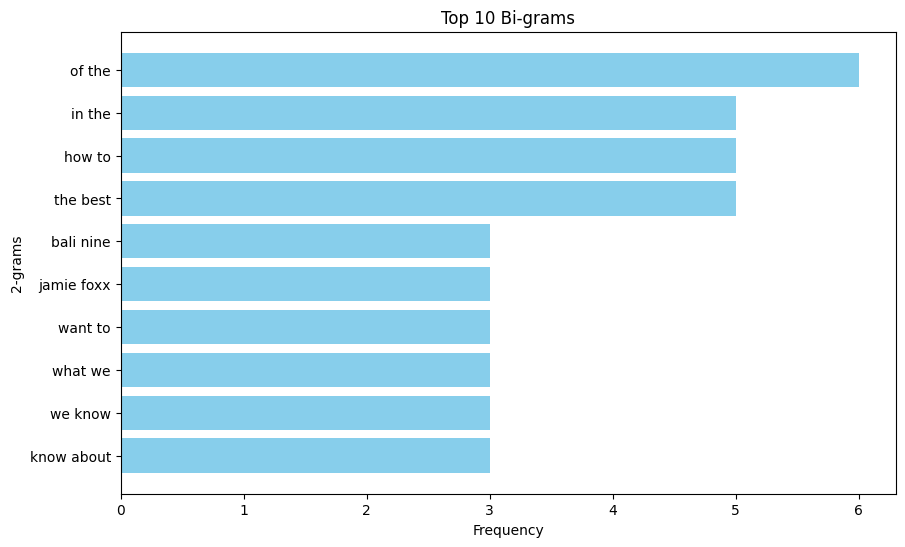

Top 10 Tri-grams:


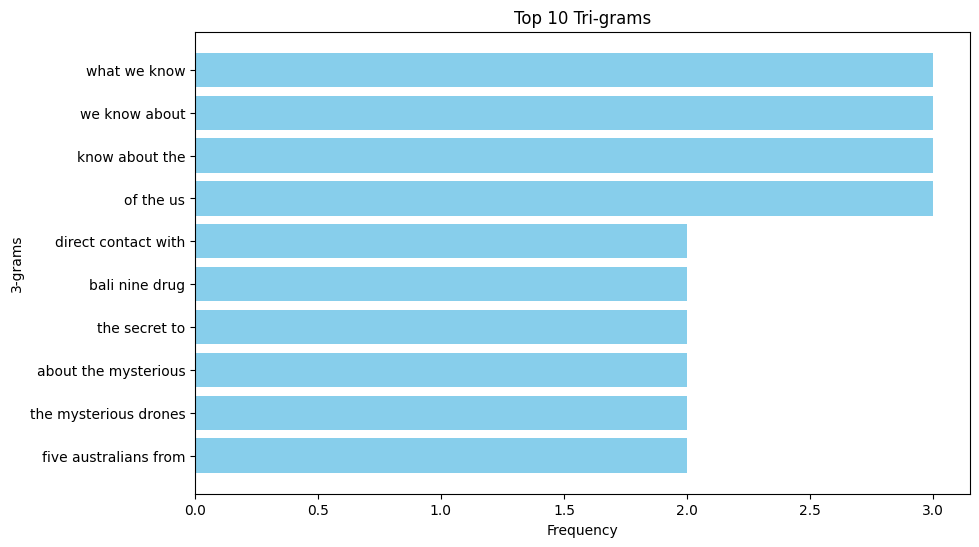

In [15]:
# Example usage
file_path = 'cleaned_data.csv'  # Replace with the path to your CSV file
text_column = 'Cleaned_text'  # Replace with the name of the text column in your CSV
process_csv(file_path, text_column, top_n=10)

# Named-Entity Recognition

In [16]:
# Load the pre-trained SpaCy model
nlp = spacy.load("en_core_web_sm")

In [17]:
# Sample text
text = "Apple is looking at buying U.K. startup for $1 billion. Tim Cook announced the plan yesterday."

In [18]:
# Process the text using the SpaCy NLP pipeline
doc = nlp(text)

In [19]:
# Visualize the named entities using displacy
displacy.render(doc, style="ent", jupyter=True)  # Use `jupyter=True` if running in Jupyter notebook

In [20]:
def visualize_ner_for_specific_row(file_path, text_column, row_index):
    """Visualize Named Entity Recognition for a specific row of text data from a CSV file."""
    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Check if the column exists in the DataFrame
    if text_column not in data.columns:
        print(f"Error: Column '{text_column}' not found in the CSV file.")
        return

    # Get the specific row by index
    if row_index >= len(data) or row_index < 0:
        print("Error: Invalid row index.")
        return

    # Extract the text for the specified row
    text = data.iloc[row_index][text_column]
    
    # Process the text using the SpaCy NLP pipeline
    doc = nlp(text)
    
    # Display the text with NER visualization
    print(f"Visualizing NER for row {row_index}:")
    displacy.render(doc, style="ent", jupyter=True)  # Use `jupyter=True` if running in Jupyter notebook

In [21]:
# Example usage
file_path = 'cleaned_data.csv'  # Replace with the path to your CSV file
text_column = 'Cleaned_text'  # Replace with the name of the text column in your CSV
row_index = 1  # Replace with the row index you want to visualize
visualize_ner_for_specific_row(file_path, text_column, row_index)

Visualizing NER for row 1:


# POS Tagging

In [22]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")  

In [23]:
# Input text for analysis
text = "The quick brown fox jumps over the lazy dog."

In [24]:
# Process the text using the spaCy pipeline
doc = nlp(text)

In [25]:
# Render the dependency parse tree
displacy.render(doc, style="dep", jupyter=True)  # Change jupyter=True if using a notebook

# Topic Modeling

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
# Sample texts
texts = [
    "The soccer team scored a goal in the final match",
    "The president gave a speech about the new policy",
    "The player was awarded the best striker of the year",
]

In [28]:
# Step 1: Turn text into numbers (Bag of Words)
vectorizer = CountVectorizer(stop_words="english")
text_matrix = vectorizer.fit_transform(texts)

In [29]:
# Step 2: Use LDA for topic modeling
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # 2 topics
lda.fit(text_matrix)

LatentDirichletAllocation(n_components=2, random_state=42)

In [30]:
# Step 3: Display the topics
feature_names = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print(", ".join(topics[topic_idx]))


Topic 1:
match, goal, soccer, final, team
Topic 2:
president, policy, gave, new, speech


- Topic 1 is about sports because it contains words like "player," "goal," and "team."
- Topic 2 is about politics because it contains words like "president" and "policy."

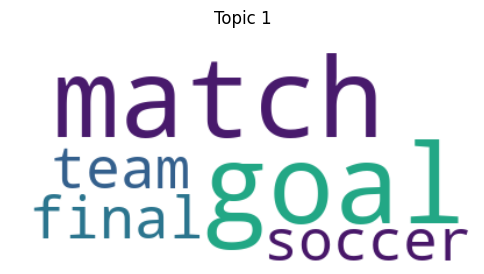

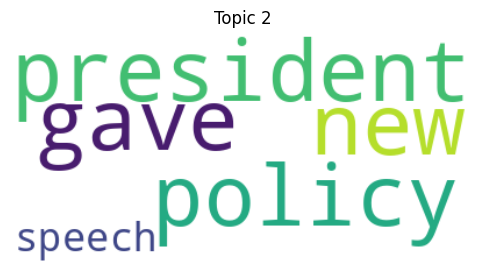

In [31]:
# Word Cloud for Each Topic
for topic_idx, words in topics.items():
    wordcloud = WordCloud(background_color='white').generate(" ".join(words))
    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1}")
    plt.show()

# Text Complexity

In [32]:
# Sample Texts
texts = [
    "The quick brown fox jumps over the lazy dog.",
    "In recent years, there has been an increasing interest in Artificial Intelligence, specifically in the area of natural language processing and its applications in various industries, including healthcare, finance, and education."
]

In [33]:
# Function to Analyze Text Complexity
def analyze_complexity(text):
    print(f"Text: {text}\n")
    
    # Flesch-Kincaid Readability Score
    fk_score = textstat.flesch_kincaid_grade(text)
    print(f"Flesch-Kincaid Grade Level: {fk_score}")
    
    # Word Count
    word_count = textstat.lexicon_count(text)
    print(f"Word Count: {word_count}")
    
    # Sentence Count
    sentence_count = textstat.sentence_count(text)
    print(f"Sentence Count: {sentence_count}")
    
    # Syllable Count
    syllable_count = textstat.syllable_count(text)
    print(f"Syllable Count: {syllable_count}")
    
    print("-" * 50)

In [34]:
# Analyze Texts
for text in texts:
    analyze_complexity(text)

Text: The quick brown fox jumps over the lazy dog.

Flesch-Kincaid Grade Level: -0.4
Word Count: 9
Sentence Count: 1
Syllable Count: 9
--------------------------------------------------
Text: In recent years, there has been an increasing interest in Artificial Intelligence, specifically in the area of natural language processing and its applications in various industries, including healthcare, finance, and education.

Flesch-Kincaid Grade Level: 21.3
Word Count: 31
Sentence Count: 1
Syllable Count: 64
--------------------------------------------------


The General Guidelines for Interpreting Scores:
- Scores 0-5: Very easy text, suitable for children or beginner readers.
- Scores 6-8: Easy to read, suitable for young adults or casual readers.
- Scores 9-12: Standard text, suitable for adults with high school education or beyond.
- Scores 13 and above: Complex text, suitable for college students or professionals in specialized fields.

### Observations:
- This notebook processes custom dataset (cleaned_data.csv) to demonstrate bi-grams, tri-grams, NER visualization, and text complexity analysis.
- Combines textual analysis with visual aids (word clouds, bar graphs, and dependency trees) for better interpretability of the NLP outcomes.
- Essential libraries like matplotlib, wordcloud, nltk, spacy, sklearn, and textstat are installed and imported for different NLP tasks.
- Generates a visual representation of the most frequent words in the text, highlighting their significance and prominence in the form of Word Cloud.
- Extracts pairs (Bi-grams) and triplets (Tri-grams) of words from the text to identify common word sequences and phrases, with visualizations created using bar charts.
- Identifies and visualizes key entities like names, organizations, and locations within the text using SpaCy's displacy.
- Analyzes the grammatical structure of sentences and visualizes the dependency tree of words (POS Tagging) in the text.
- Extracts underlying themes or topics from a corpus using Latent Dirichlet Allocation (LDA) and visualizes topics using word clouds.
- Evaluates readability using Flesch-Kincaid Grade Level and provides detailed metrics like word count, sentence count, and syllable count for input text.